In [30]:
# import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
path = "/Users/tequila2411/Desktop/Iris.data"
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度',u'类别'
data = pd.read_csv(path, header=None)
data.columns=iris_feature
data['类别']=pd.Categorical(data['类别']).codes
x_train = data[['花萼长度','花瓣长度']]
y_train = data['类别']
model = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
M,N = 500,500
x1_min,x2_min = x_train.min(axis=0)
x1_max,x2_max = x_train.max(axis=0)
t1 = np.linspace(x1_min,x1_max,M)
t2 = np.linspace(x2_min,x2_max,N)
x1,x2 = np.meshgrid(t1,t2)
x_show = np.stack((x1.flat,x2.flat),axis = 1)
y_predict = model.predict(x_show)
print(y_predict)

[0 0 0 ... 2 2 2]


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


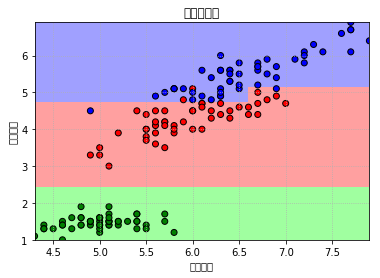

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(x1, x2, y_predict.reshape(x1.shape), cmap=cm_light)
plt.scatter(x_train['花萼长度'],x_train['花瓣长度'],c=y_train,cmap=cm_dark,marker='o',edgecolors='k')
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('鸢尾花分类')
plt.grid(True,ls=':')